# Sampling using `sim_tools` classes

This notebook provides an overview of how to use the `Distribution` classes from the `sim_tools.distributions` module.

The classes are a higher level abstract of sampling from the numpy library. They encapsulate the distribution parameters, a random number generator instance, and a random seed.  For example, the code for the Triangular class is:

```python
class Exponential(Distribution):
    """
    Convenience class for the exponential distribution.
    packages up distribution parameters, seed and random generator.
    """

    def __init__(self, mean: float, random_seed: Optional[int] = None):
        """
        Constructor

        Params:
        ------
        mean: float
            The mean of the exponential distribution

        random_seed: int, optional (default=None)
            A random seed to reproduce samples.  If set to none then a unique
            sample is created.
        """
        super().__init__(random_seed)
        self.mean = mean

    @abstractmethod
    def sample(self, size: Optional[int] = None) -> float | np.ndarray:
        """
        Generate a sample from the exponential distribution

        Params:
        -------
        size: int, optional (default=None)
            the number of samples to return.  If size=None then a single
            sample is returned.
        """
        return self.rng.exponential(self.mean, size=size)

```

Here we can see that the `__init__` method accepts the distribution mean plus a random seed to control sampling from a `np.random.Generator` object.  The creation of the generator is done by the super class `Distribution`

The `sample` method delegates work to the `np.random.Generator` object.

The abstraction into a class enables the distribution to be used as a simple parameter in a model.

### Summary of implemented distributions

1. **Exponential**: This class is used for modeling the time between events in a Poisson process, where events occur continuously and independently at a constant average rate. It takes the mean of the distribution and an optional random seed as parameters.

2. **Bernoulli**: This class models a process where an event has only two possible outcomes (success or failure). It takes the probability of success and an optional random seed as parameters.

3. **Lognormal**: This class is used when the logarithm of a variable is normally distributed. It takes the mean and standard deviation of the lognormal distribution and an optional random seed as parameters.

4. **Normal**: This class models a process where a variable is normally distributed. It takes the mean and standard deviation of the normal distribution, a boolean to allow or disallow negative samples, and an optional random seed as parameters.

5. **Uniform**: This class models a process where all outcomes are equally likely. It takes the lower and upper range of the uniform distribution and an optional random seed as parameters.

6. **Triangular**: This class models a process where a variable is most likely to be at the mode (peak) and the probabilities decrease uniformly on either side. It takes the lower limit, mode, upper limit, and an optional random seed as parameters.

7. **FixedDistribution**: This class returns a fixed value, useful when a constant value is needed in a simulation. It takes a fixed value as a parameter.

8. **CombinationDistribution**: This class is used to model a process where the outcome is the sum of outcomes from multiple distributions. It takes multiple distribution instances as parameters.

9. **ContinuousEmpirical**: This class is used to model a process based on observed data, where the probability of an outcome is proportional to its frequency in the data. To produce a continuous value, linear interpolation between bounds is used. It takes lower bounds (of a discrete empirical distribution), upper bounds, observed frequencies, and an optional random seed as parameters.

10. **Erlang**: This class is used for modeling the time between events in a Poisson process, where events occur continuously and independently at a constant average rate. The class is implemented to allow for users to input the mean, and stdev of the distribution as opposed to k and theta. The mean and stdev are converted to k and theta internally. The Erlang is a special case of the gamma distribution where  is an integer.  Internally this is implemented using numpy Generator's gamma method. As k is calculated from the mean and stdev it is rounded to an integer value using python's built in 'round' function. Optionally a user can offet the original of the distribution using the location parameter.


## Example output

The code below creates an instance of the distributions on offer. Here we used the `size` parameter in `sample()` to produce a large number of samples to allow for visualisation.

In [1]:
# import all distributions
from sim_tools.distributions import (Exponential, 
                                    Bernoulli, 
                                    Lognormal, 
                                    Normal, 
                                    Uniform, 
                                    Triangular,
                                    FixedDistribution, 
                                    CombinationDistribution,
                                    ContinuousEmpirical,
                                    Erlang)

### Create plots

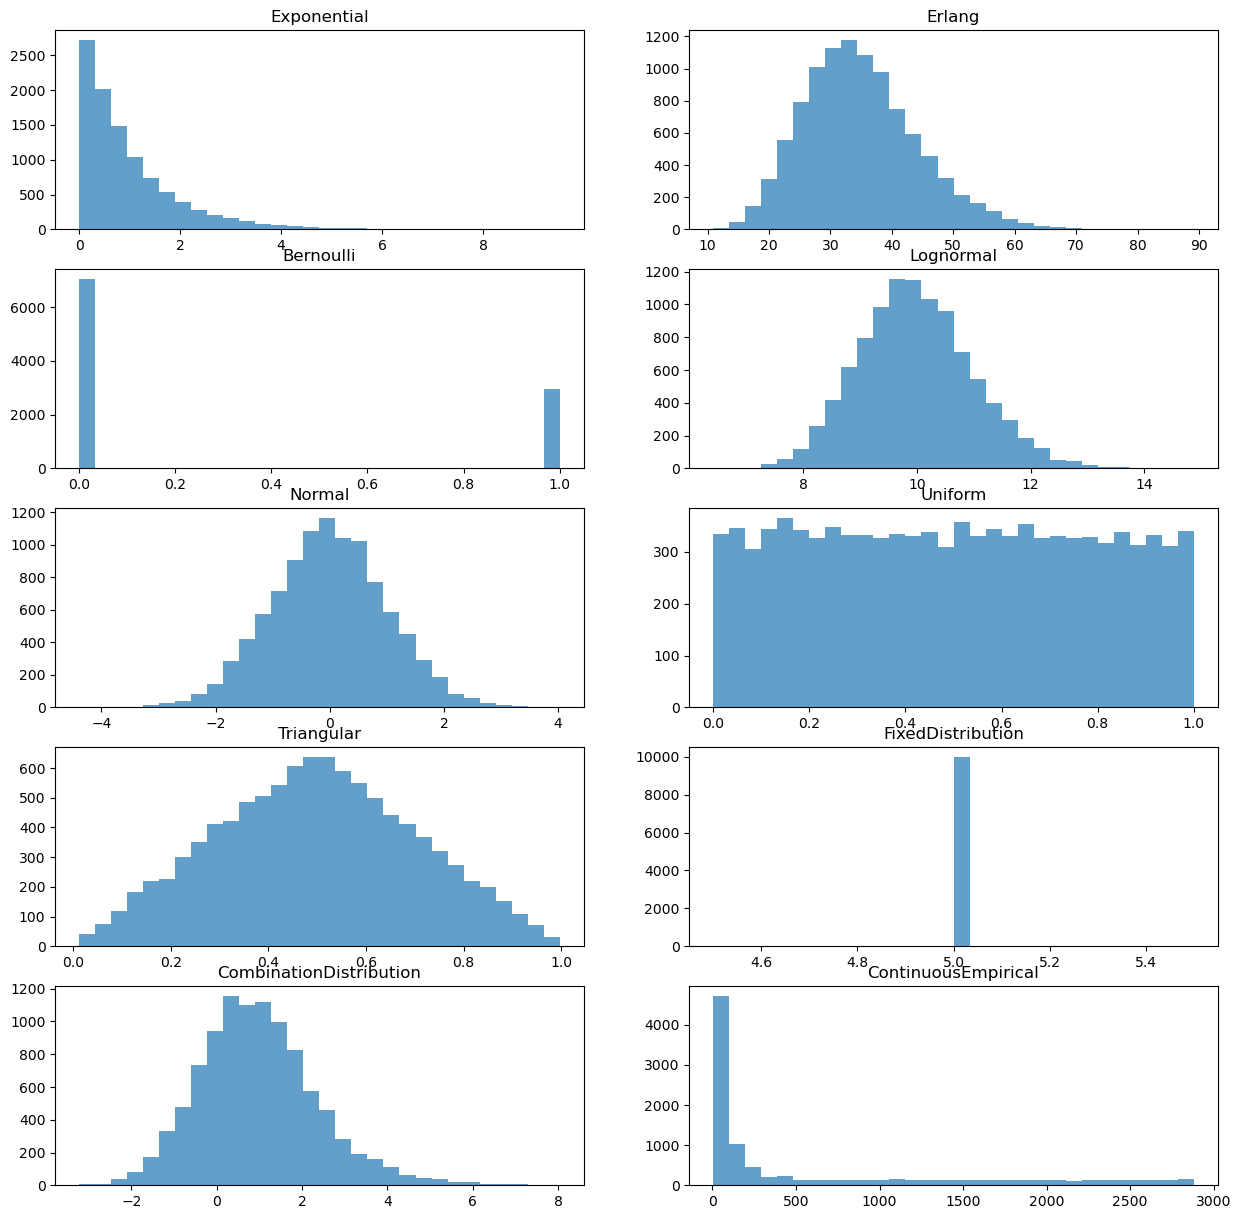

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of each distribution and generate 10,000 samples
distributions = [
    Exponential(mean=1.0, random_seed=42),
    Erlang(mean=32.0, stdev=9.26, location=2.83, random_seed=42),
    Bernoulli(p=0.3, random_seed=42),
    Lognormal(mean=10, stdev=1, random_seed=42),
    Normal(mean=0, sigma=1, allow_neg=True, random_seed=42),
    Uniform(low=0, high=1, random_seed=42),
    Triangular(low=0, mode=0.5, high=1, random_seed=42),
    FixedDistribution(value=5),
    CombinationDistribution(Exponential(mean=1.0), Normal(mean=0, sigma=1, allow_neg=True)),
    ContinuousEmpirical(lower_bounds = [0, 5, 10, 15, 30, 45, 60, 120, 180, 240, 480],
                        upper_bounds = [5, 10, 15, 30, 45, 60, 120, 180, 240, 480, 2880],
                        freq = [34, 4, 8, 13, 15, 13, 19, 13, 9,  12, 73],
                        random_seed=42)
]

fig, axs = plt.subplots(len(distributions) // 2, 2, figsize=(15, 15))

for i, distribution in enumerate(distributions):
    row = i // 2
    col = i % 2
    samples = distribution.sample(size=10000)
    axs[row, col].hist(samples, bins=30, alpha=0.7)
    axs[row, col].set_title(distribution.__class__.__name__)

plt.show()

## Single samples

In [4]:
arrival_dist = Exponential(mean=30, random_seed=42)
arrival_dist.sample()

72.12625811897983

In [5]:
activity_time = ContinuousEmpirical(
                        lower_bounds=[0, 5, 10, 15, 30, 45, 60, 120, 180, 240, 480],
                        upper_bounds=[5, 10, 15, 30, 45, 60, 120, 180, 240, 480, 2880],
                        freq=[34, 4, 8, 13, 15, 13, 19, 13, 9,  12, 73],
                        random_seed=42, 
)

activity_time.sample()

1297.0730413946362